In [1]:
#Libraries that we have covered before that are used in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# <center> Econ 390: Computational Economics </center>

## <center> Dr. Yaroslav Rosokha</center>
##### <center> Assistant Professor of Economics </center>
##### <center> Purdue University </center>

## Week 10: Dynamic Programming

### Contents
- [Motivation](#Motivation)
- [Background on Dynamic Optimization](#Background)
- [Dynamic Programming](#Dynamic-Programming)
    - [Finite-horizon Dynamic Programming](#Finite-horison-Dynamic-Programming)


## Motivation

In static optimization, the task is to find a single value for each variable. In *dynamic settings* that have multiple time peirods, we need to find the optimal policy for entire horizon. Where the policy (or strategy) has to specify the choice at every possible decision node that agent could face.

The example that you typically study in the intermediate microeconomics class is the optimal choice of consumption and saving over time. These problems are know as **intertemporal choice** problems.

## Background

### The agent-environment interface
 - The decision-maker is called the agent (controller).
 - Everything outside the agent, is called the environment (control system).
 - The agent is selects actions (control signal) and the environment responds to those actions and presets new situations to the agent. 
 - The environment also gives rise to rewards.
 - Roughly speaking, the agent’s goal (control problem) is to maximize the total reward/utility over the long run.

### Control Problem: Four Elements

 - **Policy Function** – defines actions at a given time.
    - A mapping from perceived states to actions to be taken when in those states
 - **Reward Function** – defines the goal.
    - A mapping from perceived state (or state-action pair) to a reward/utility
 - **Value Function** – functions of states (or of state-action pairs) that estimate “how good” it is for the agent to be in a given state (or how good it is to perform a given action in a given state)
    - The notion of “how good” is defined in terms of total future reward/utility that an agent can expect to accumulate starting from that state 
    - Since the rewards the agent can expect to receive depends on the actions he will take, the value function is specific to the policy
 - **Model of the environment** - the rules of the enviroment


## Dynamic Programming

> **dynamic programming** -- a collection of algorithms that can be used to cmpute optmial policies for dynamic control problems

The mathematical theory of dynamic programming go back to Bellman (1957) and Bertsekas (1976). The key idea of Dynamic Programming is the use of value functions to organize and structure the search for optimal policies. 

> **value function** (denoted as $V_t(x)$) -- the greatest feasible total expected payoff from time $t$ forward, if at time $t$ the system is in state $x$.

## Finite-horizon Dynamic Programming

### Simplified Problem: Finite Horizon, Discrete Choice

Suppose you own a share of stock that pays a dividend $D_t\in\{0,10\}$ each period. Specifically, the dividend realization depends on how well the company does: when the company does well you get $10$ and when the company does poorly you get $0$ (assume that these two states are equally likely and independent of past history of realizations).

For simplicity, suppose that you begin with 2 in your savings account and that the share of the stock is your only source of income. Further suppose that your utility of consuming $c$ units in a period is given by $u(c)=\sqrt(c)$ and that you live for $T=20$ periods.

You need to figure out your optimal policy. That is you need to figure out what will be your consumption decision depending on the period you are in and the total amount of assets in your account.

In [3]:
def util(x):
    return np.sqrt(x)

# In-class Exercise

Write a program to find the optimal policy for the problem above

In [4]:
#Step 1: What should you do in period 20? -- spend everything
asset_grid20=np.linspace(0,202,203,dtype=int) #in period 20 the maximum you could have is 2+20*10
policy20=asset_grid20.copy() #the best policy in period 20 is to spend everything
value20=util(policy20) #the value of having x units is u(x)

In [7]:
# Step 2: Suppose you are in period 19 and you have A in total
# What x maximizes that u(x)+ .5(Value20(S-x))+.5(Value20(S-x+10)?
T = 19
A = 10

spending_grid19=np.linspace(0,A,A+1,dtype=int)
expectedPayoffs=np.zeros_like(spending_grid19,dtype=float)

for x in spending_grid19: #can spend up to A (assuming no credit)
    expectedPayoffs[x]=util(x)+.5*value20[A-x]+.5*value20[A-x+10]

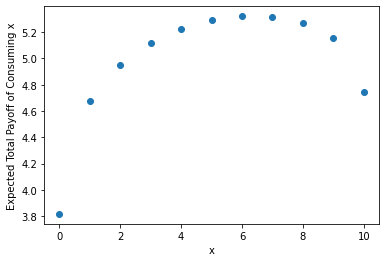

In [8]:
plt.plot(spending_grid19,expectedPayoffs,'o')
plt.xlabel('x')
plt.ylabel('Expected Total Payoff of Consuming x')
plt.show()

In [25]:
ix = expectedPayoffs.argmax()
spending_grid19[ix]

6

In [48]:
# Step 3: Find the optimal policy in period 19 (i.e., for all possible A)

asset_grid19=np.linspace(0,2+19*10,2+19*10+1,dtype=int)
policy19=np.zeros_like(asset_grid19,dtype=int)
value19=np.zeros_like(asset_grid19,dtype=float)

for a in asset_grid19:
    
    ## TODO IN CLASS

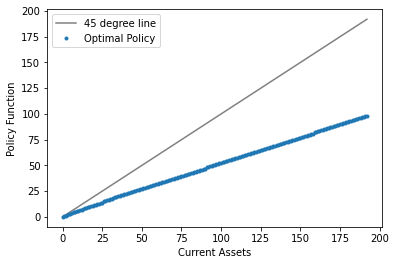

In [56]:
plt.plot(asset_grid19,asset_grid19,'gray',label='45 degree line')
plt.plot(asset_grid19,policy19,'.',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.ylabel('Policy Function')
plt.legend()
plt.show()

In [67]:
# Step 4: Find the optimal policy for every period t (continue working backwards)
T=20 #Number of periods
a1=2 #Starting assets
I=10 #Income

assets = np.zeros(shape=(T,a1+T*I+1),dtype=int)
policies = np.zeros_like(assets,dtype=int)
values = np.zeros_like(assets,dtype=float)

for t in range(T,0,-1):
    
    assets[t-1][0:a1+t*I+1]=np.linspace(0,a1+t*I,a1+t*I+1,dtype=int)
    
    if t==T:
        
        # TODO IN CLASS
    
    else:
        
        # TODO IN CLASS
        

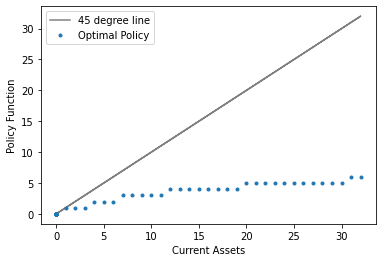

In [86]:
t=2
plt.plot(assets[t],assets[t],'gray',label='45 degree line')
plt.plot(assets[t],policies[t],'.',label='Optimal Policy')
plt.xlabel('Current Assets')
plt.ylabel('Policy Function')
plt.legend()
plt.show()

## In-class Exercise
What is the average life-time utility? (monte-carlo simulation)

In [ ]:
# TODO IN CLASS

In [83]:
#Extensions:
# -- continuous variables (interpolation)
# -- income as a markov process (employment-unemployment dynamics)
# -- availability of credit